In [1]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
#%matplotlib widget

import os, sys, importlib
sys.path.append('./XPCS_library/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

# RAW FOLDER PATH
raw_folder = '../RAW_DATA/'
mask_folder = '../masks/'
fit_out_folder = './data/fit_outs/'
Idt_folder = './data/Idts/'
g2_folder = './data/g2/'

# EXPERIMENTAL VARIABLES
XPCS.set_expvar(1350, 1350, 7)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

## Load masks

In [2]:
e4m_htmask = np.load(mask_folder+'e4m_htmask_copper_foil_30um_1_1'+'.npy')
e4m_mask = np.load(mask_folder+'e4m_mask'+'.npy')

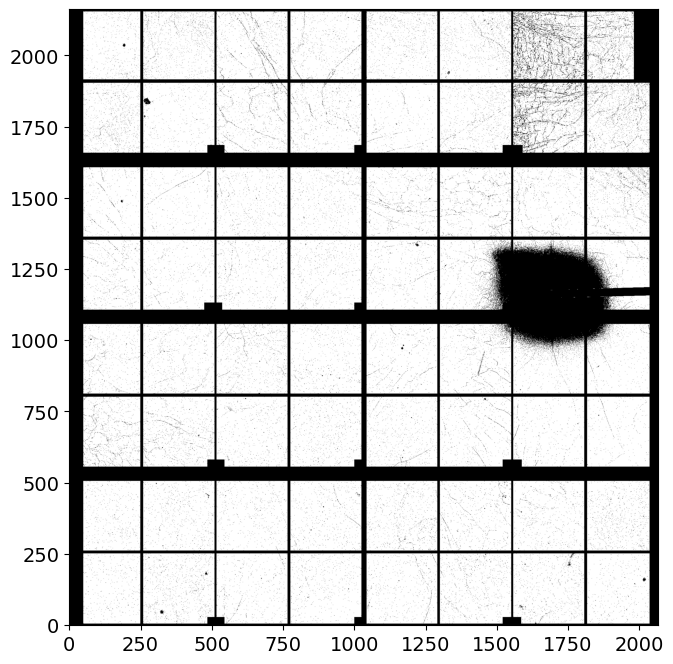

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow((e4m_mask*e4m_htmask).reshape(Nx,Ny), cmap='gray', origin='lower')

## BS mask and Q definition
Using a random scan in GeO2_6, because we are not changing the measurement configuration

#### Beamstop mask

In [4]:
#######################################
sample_name = 'GeO2_6'
Ndataset = 1
Nscan =12
Nfi, Nff = 0, 1000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

#############################
command = mtimescan 0.02 1 220000
Ei = 9.699998837562536
itime = 0.0201
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/1 loops)
Done!
Concatenating vectors ...
Done!
	 | Sparse array loaded from ../RAW_DATA/GeO2_6/GeO2_6_0001/scan0012/
	 | Shape:       (1000, 4471016)
	 | Sparsity:     3.8e-03
	 | Memory usage (scipy.csr_array): 0.192 GB (np.array usage: 16.656 GB)


################################################################################
Maximum count in the hull run -> 4689
# of pixels above Ith_high treshold ->  75 pixels (of 4471016 => 0.0 %)
################################################################################



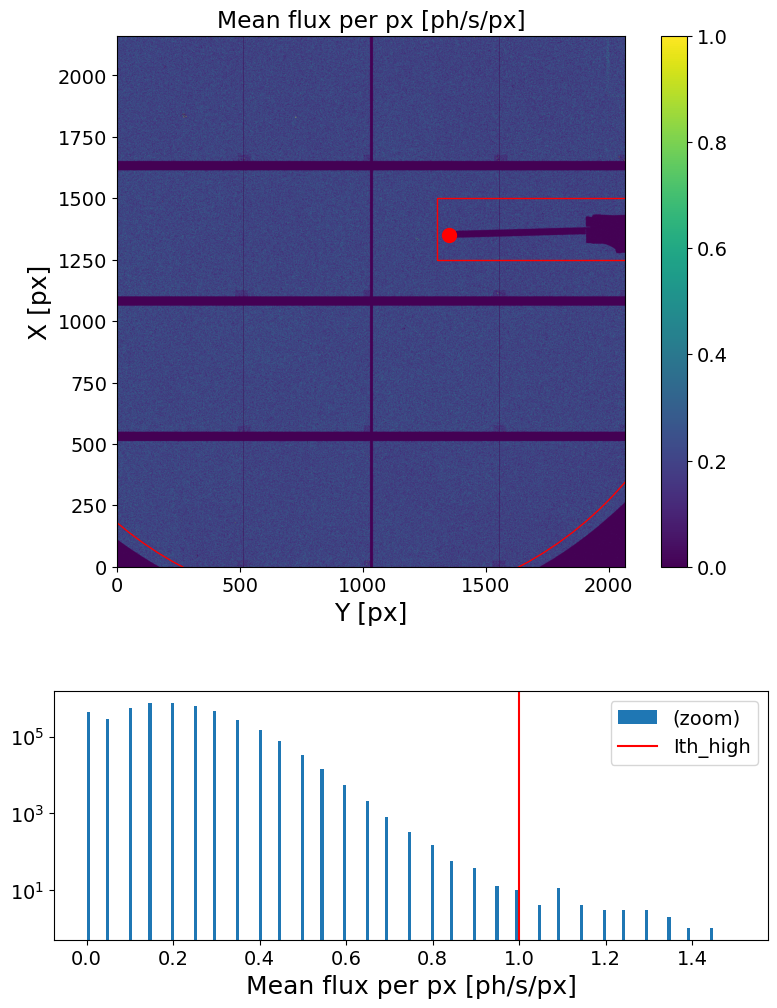

In [5]:
geom = [{'geom':'Rectangle', 'x0':1250, 'y0':1300, 'xl':250, 'yl':1950, 'inside':False},
        {'geom':'Circle', 'Cx':1300, 'Cy':950, 'r':1470, 'inside':True}, 
        ]
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1, Nff=10000, mask_geom=geom,)

#################################################
Masked area =  93.74594052000708 %
#################################################



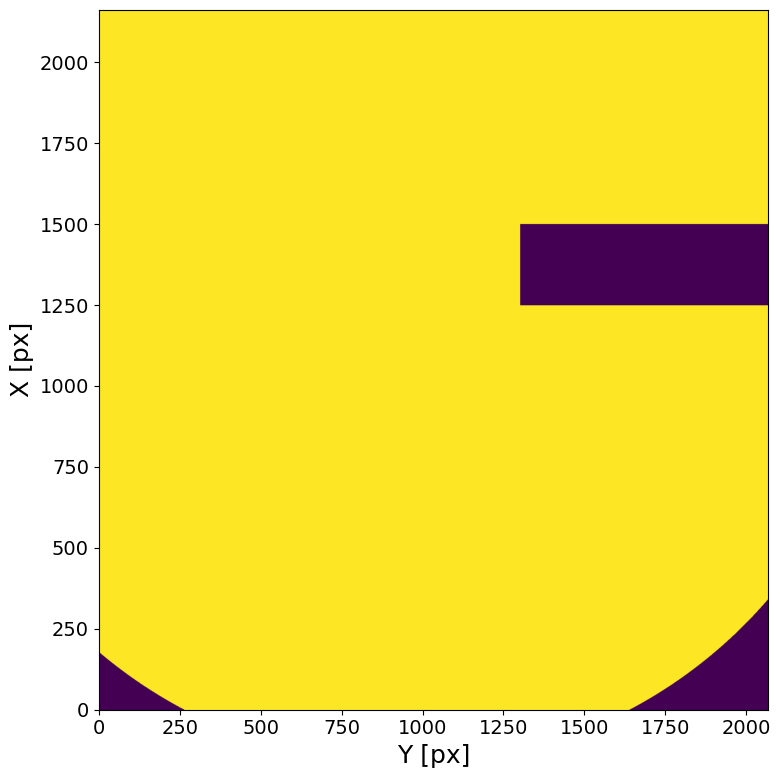

In [6]:
bs_mask = XPCS.gen_mask(e4m_data, itime, e4m_mask=None, mask_geom=geom)

##  XPCS scan (Q =  0.19 Å$^{-1}$, delcoup = 1.75, 30 min @ 1ms (600000fm circa, 150000 accessibili ci sono stati problemi)) (GeO2_6q_delcoup1.75, dataset 1, scan 1) T = 30 $^{\circ}C $

In [16]:
#######################################
sample_name = 'GeO2_6q_delcoup_1.75'
Ndataset = 1
Nscan = 1
Nfi, Nff = None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/29 loops)
	 -> load

### Qmask

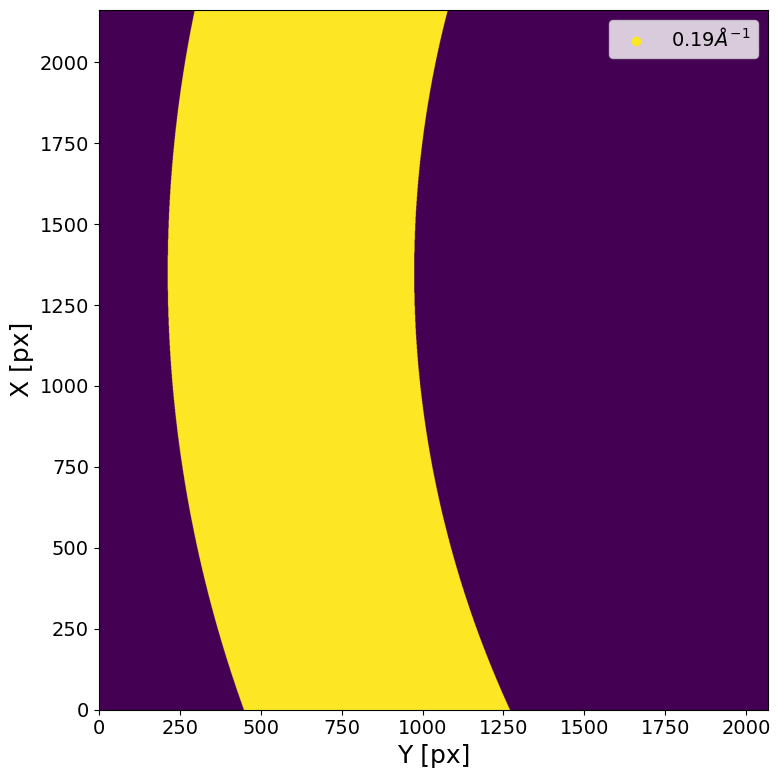

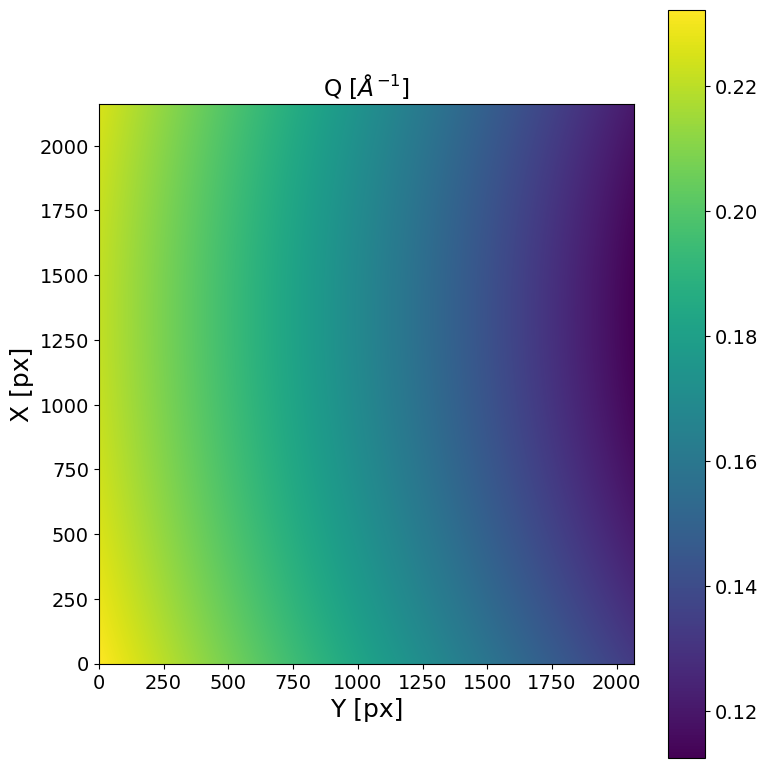

In [17]:
###################
Q    = .19
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=True)

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  3 pixels (of 4471016 => 0.0 %)
################################################################################



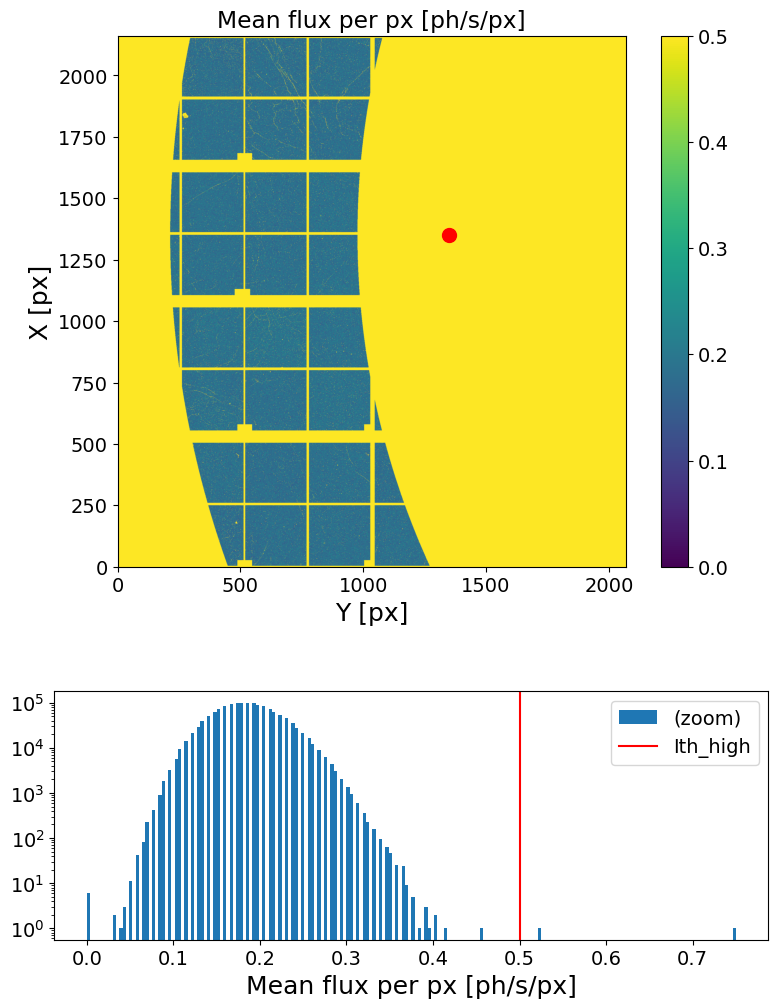

In [18]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.5, Nff=10000000, e4m_mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [19]:
####################
Lbin = 1
Nstep = 1
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

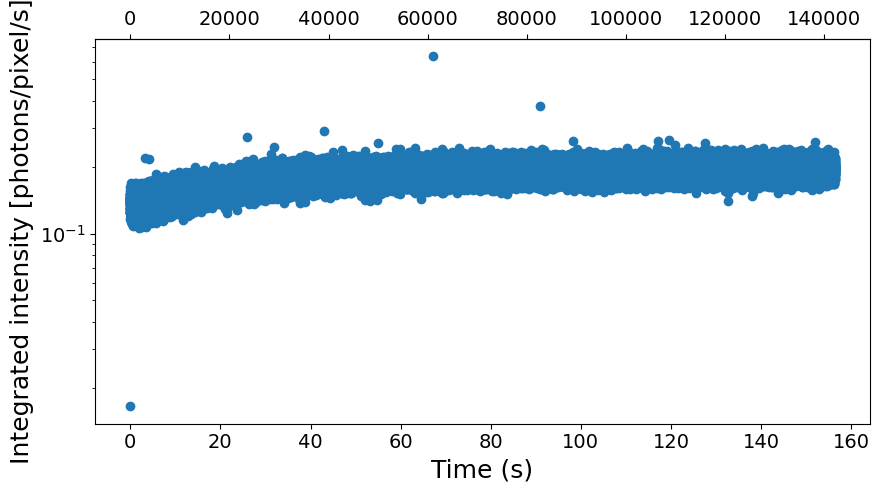

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.yscale('log')

### Correlation

In [22]:
###################
Nfi = 40000
Nff = None
Lbin = 1
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
##################2
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin)

Loading frames ...
Done! (elapsed time = 1.51 s)
Masking data ...


Done! (elapsed time = 2.42 s)
	 | 102112 frames X 1427140 pixels
	 | sparsity = 2.14e-04
	 | memory usage (sparse.csr_array @ float32) = 0.349 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 4.54 s)
	 | 102112 X 102112 squared matrix
	 | memory usage (np.array @ float32) = 38.843 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 3.92 s)



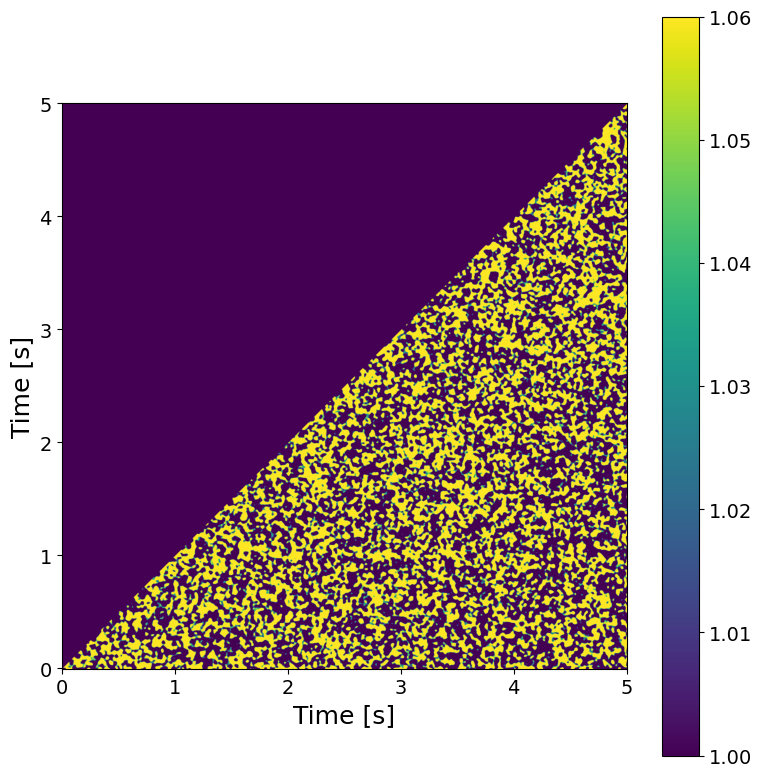

In [23]:
############################
t1, t2 = 0, 5
vmin, vmax = 1.0, 1.06
############################
XPCS.plot_G2t(G2t, vmin, vmax, itime=itime, t1=t1, t2=t2, sigma_filter=10)

In [24]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    t_bunch = round(itime*Lbin*NfXbunch*(n+1/2),1)

    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2_mt(itime*Lbin, g2[t_bunch])

if Nbunch == 1:
    np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t=t[t_bunch], g2=g2[t_bunch], t_mt=t_mt[t_bunch], g2_mt=g2_mt[t_bunch])   

Computing g2...
Done! (elapsed time = 18.82 s)



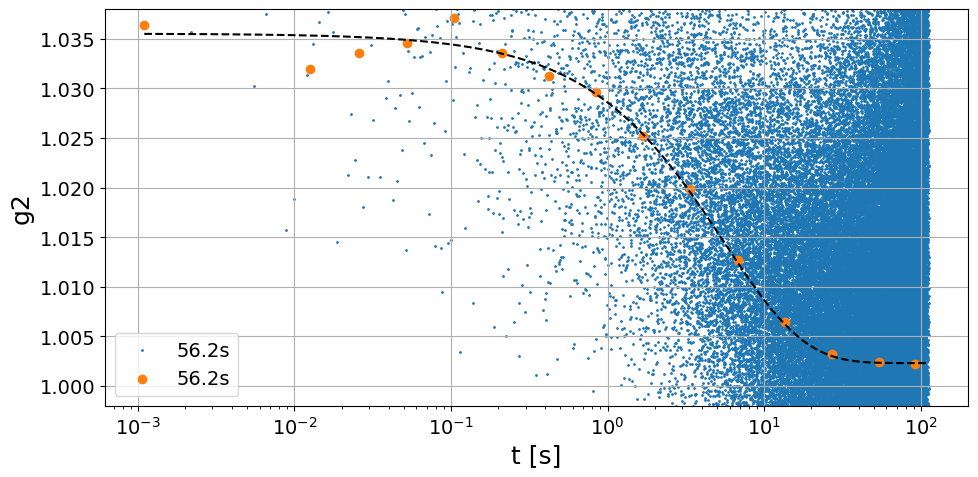

tau = 5.5266 +/- 0.6226
beta = 0.8482 +/- 0.0872
c = 0.0332 +/- 0.0024
y0 = 1.0023 +/- 0.0002


In [25]:
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0']); fit_out.index.name = 't'

plt.figure(figsize=(10,5))
for k in g2.keys():
    if Nbunch == 1: plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

    popt, pcov = curve_fit(decorelation_f, t[k], g2[k], p0=[3, .7, .03, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    fit_out.loc[k] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
    
    X = np.arange(np.min(t[k]), np.max(t[k]), 1e-4)
    Y = decorelation_f(X, *popt)
    plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(.998, 1.038)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

if Nbunch == 1:
    fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')
    print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
    print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
    print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
    print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')
else:
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0, 0].errorbar(fit_out.index, fit_out.tau,  yerr=fit_out.dtau, fmt='o')
    ax[0, 0].set_xlabel('t [s]')
    ax[0, 0].set_ylabel('$\\tau$ [s]')
    ax[0, 1].errorbar(fit_out.index, fit_out.beta,  yerr=fit_out.dbeta, fmt='o')
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel('$\\beta$')
    ax[1, 0].errorbar(fit_out.index, fit_out.c,  yerr=fit_out.dc, fmt='o')
    ax[1, 0].set_xlabel('t [s]')
    ax[1, 0].set_ylabel('$c$')
    ax[1, 1].errorbar(fit_out.index, fit_out.y0,  yerr=fit_out.dy0, fmt='o')
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('$y_0$')
    plt.tight_layout()
    plt.show()

##   XPCS scan (Q =  0.13 Å$^{-1}$, delcoup = 1.00, 60 min @ 1ms (3600000fm) (GeO2_6q_delcoup1, dataset 1, scan 2) T = 30 $^{\circ}C $

In [7]:
#######################################
sample_name = 'GeO2_6q_delcoup_1'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, 2_600_000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 1.0000000000000004
Q = 0.09
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/521 loop

	 -> loading file eiger4m_v2_sparse_frame_0_00077.h5 (78/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00078.h5 (79/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00079.h5 (80/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00080.h5 (81/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00081.h5 (82/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00082.h5 (83/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00083.h5 (84/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00084.h5 (85/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00085.h5 (86/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00086.h5 (87/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00087.h5 (88/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00088.h5 (89/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00089.h5 (90/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00090.h5 (91/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_0009

### Qmask

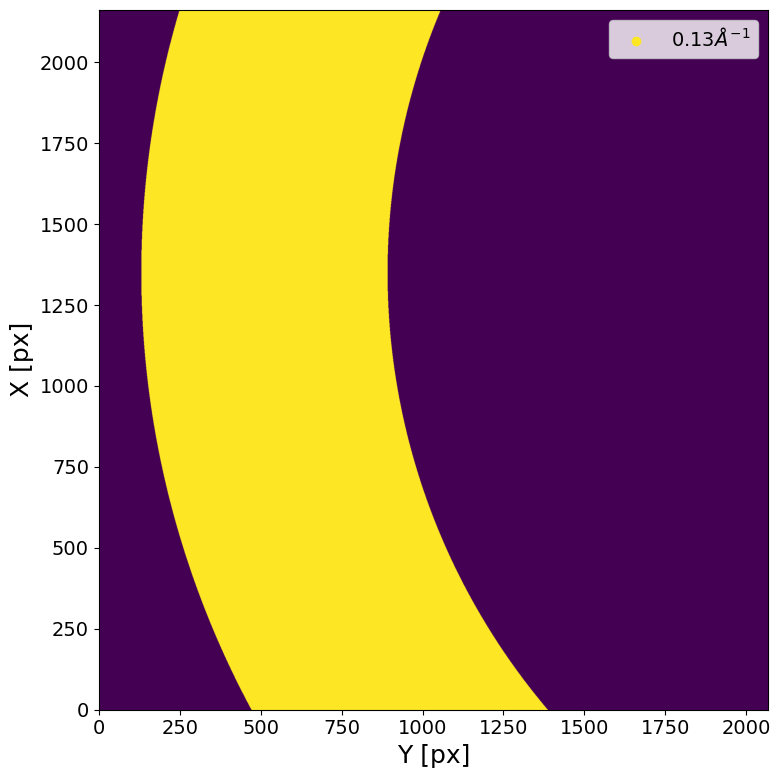

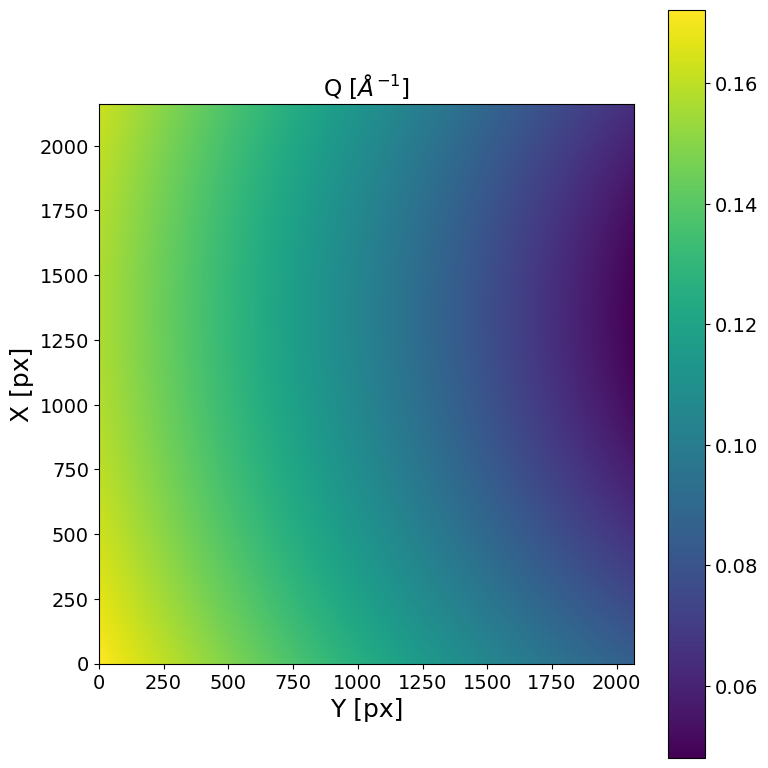

In [8]:
###################
Q    = .13
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=True)

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  2 pixels (of 4471016 => 0.0 %)
################################################################################



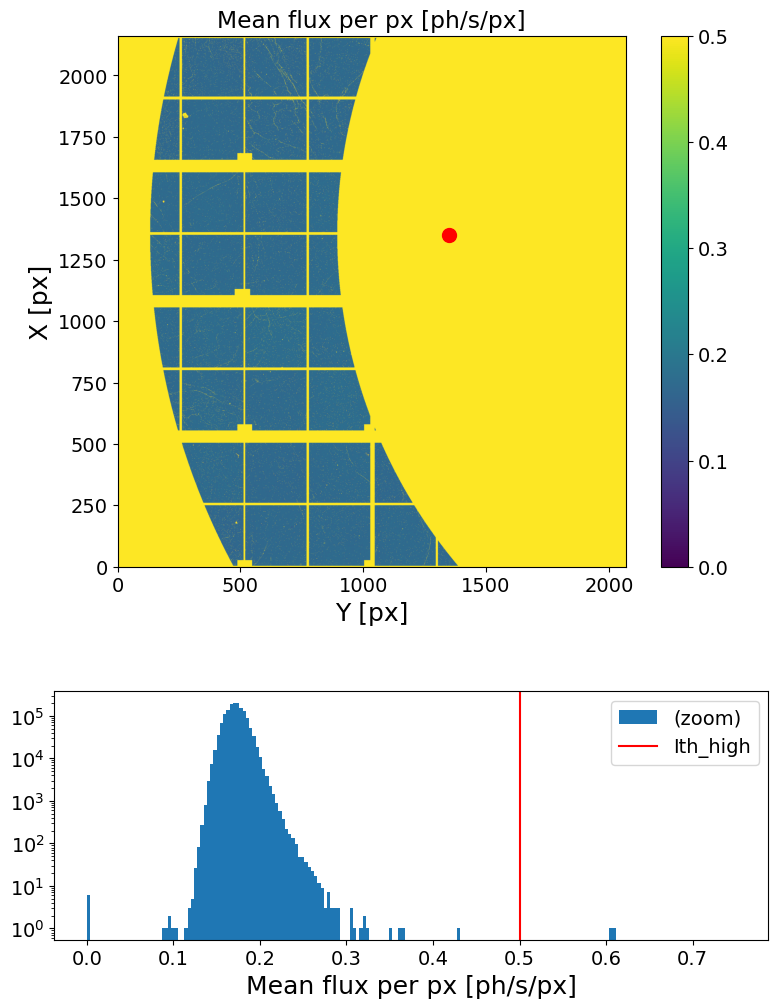

In [9]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.5, Nff=10000000, e4m_mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [10]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

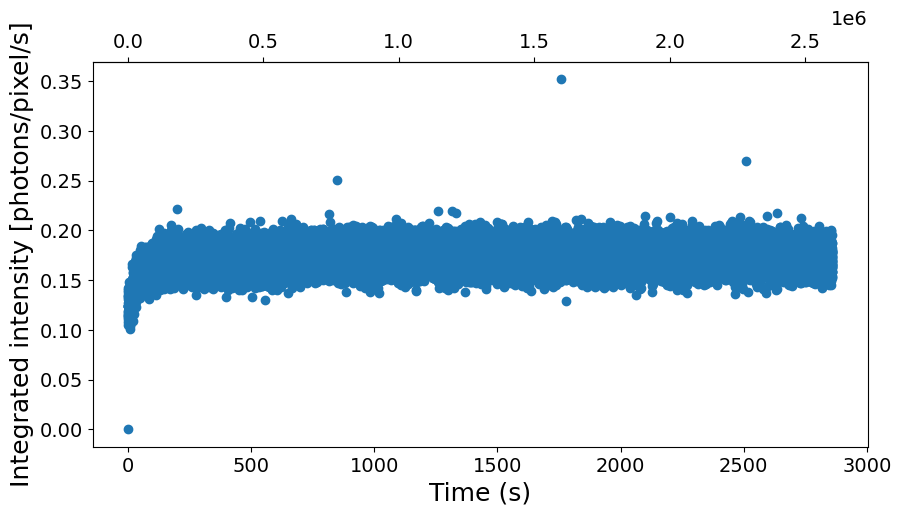

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [ ]:
####################
depth = 20
Ndata = 2**21
####################
print('log2(Nf) =', np.log2(e4m_data.shape[0]))
print('data thrown =', round((e4m_data.shape[0] - Ndata)/e4m_data.shape[0]*100, 2), '% (', round((e4m_data.shape[0] - Ndata)), ')')

log2(Nf) = 21.310080192577903
data thrown = 19.34 % ( 502848 )


In [33]:
##### INPUTS #####
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
Nfi = 40000
Nff = 40000 + 2**21
sparse_depth = 12
dense_depth = 20
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...
Done! (elapsed time = 21.74 s)
Masking data ...
Done! (elapsed time = 43.41 s)
	 | 2097152 frames X 1463650 pixels
	 | sparsity = 1.90e-04
	 | memory usage (sparse.csr_array @ float32) = 6.535 GB
Computing sparse multitau G2t...


100%|██████████| 512/512 [02:17<00:00,  3.72it/s]


Done! (elapsed time = 139.25 s)
Computing dense multitau G2t...


100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

Done! (elapsed time = 3.66 s)


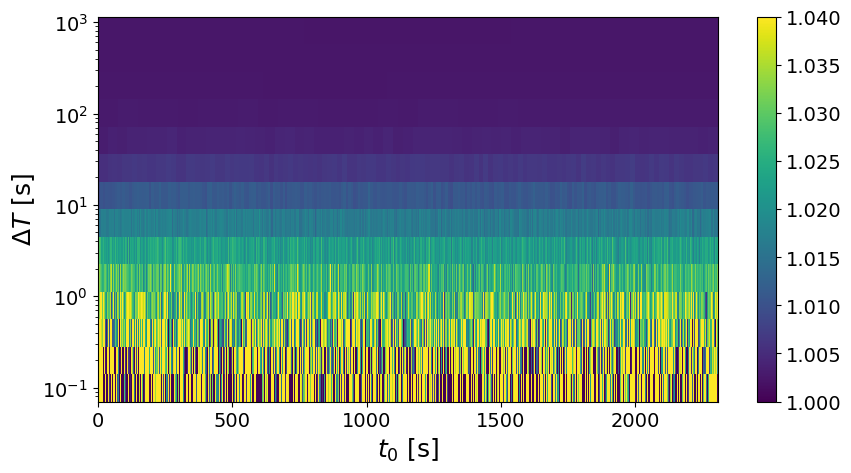

In [45]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 6
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt)

In [53]:
t_mt = 2**np.arange(len(G2tmt))*itime
g2_mt = np.array([np.mean(G2tmt[b]) for b in range(len(G2tmt))])
dg2_mt = np.array([np.std(G2tmt[b])/np.sqrt(G2tmt[b].size) for b in range(len(G2tmt))])

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)

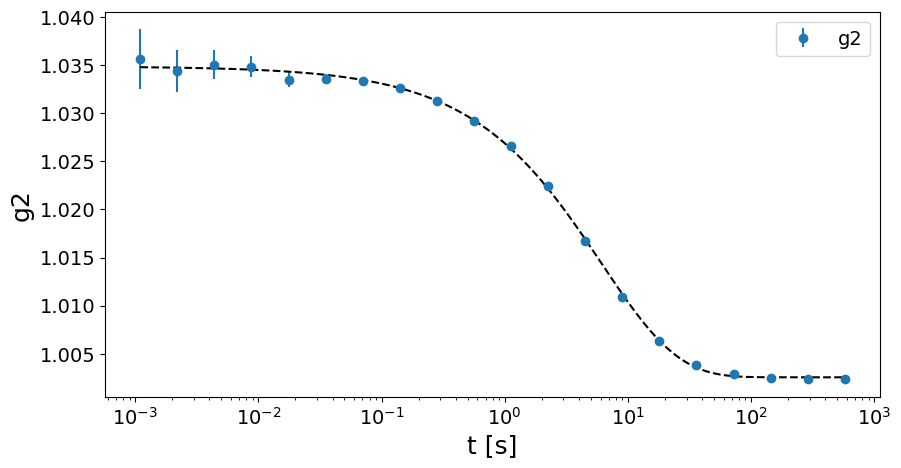

####### Fit parameters #######
tau = 6.0742 +/- 0.1994
beta = 0.6984 +/- 0.0195
c = 0.0323 +/- 0.0003
y0 = 1.0025 +/- 0.0002


In [ ]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')

##   XPCS scan (Q =  0.293 Å$^{-1}$, delcoup = 3.00, 60 min @ 1ms (3600000fm) (GeO2_6q_delcoup3, dataset 1, scan 2) T = 30 $^{\circ}C $

In [62]:
#######################################
sample_name = 'GeO2_6q_delcoup_3'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
#e4m_data = ID10.load_dense_e4m_new(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 3.0000000000000004
Q = 0.26
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/720 loop

	 -> loading file eiger4m_v2_sparse_frame_0_00239.h5 (240/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00240.h5 (241/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00241.h5 (242/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00242.h5 (243/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00243.h5 (244/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00244.h5 (245/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00245.h5 (246/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00246.h5 (247/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00247.h5 (248/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00248.h5 (249/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00249.h5 (250/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00250.h5 (251/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00251.h5 (252/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00252.h5 (253/720 loops)
	 -> loading file eiger4m_v2_spars

### Qmask

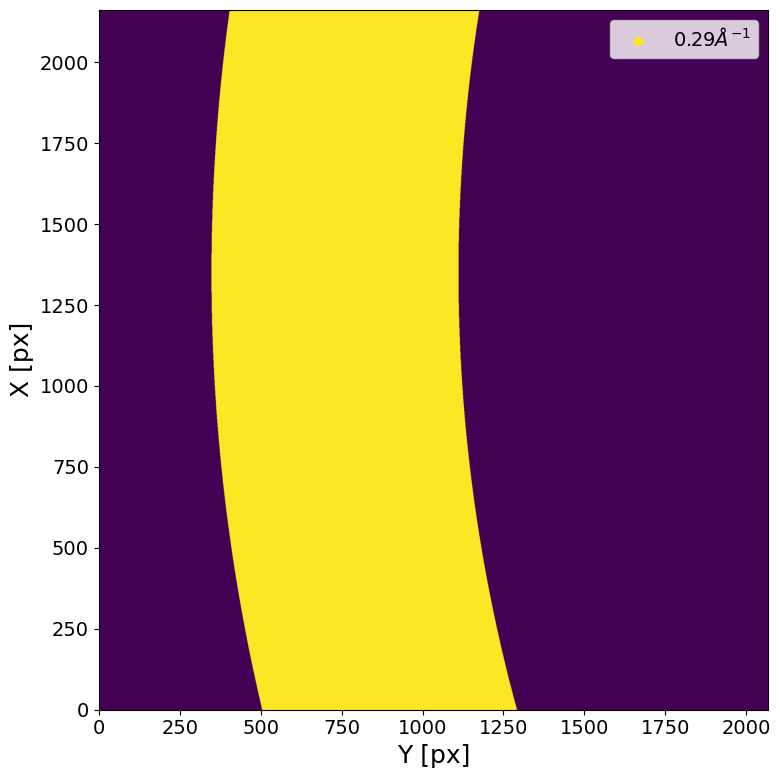

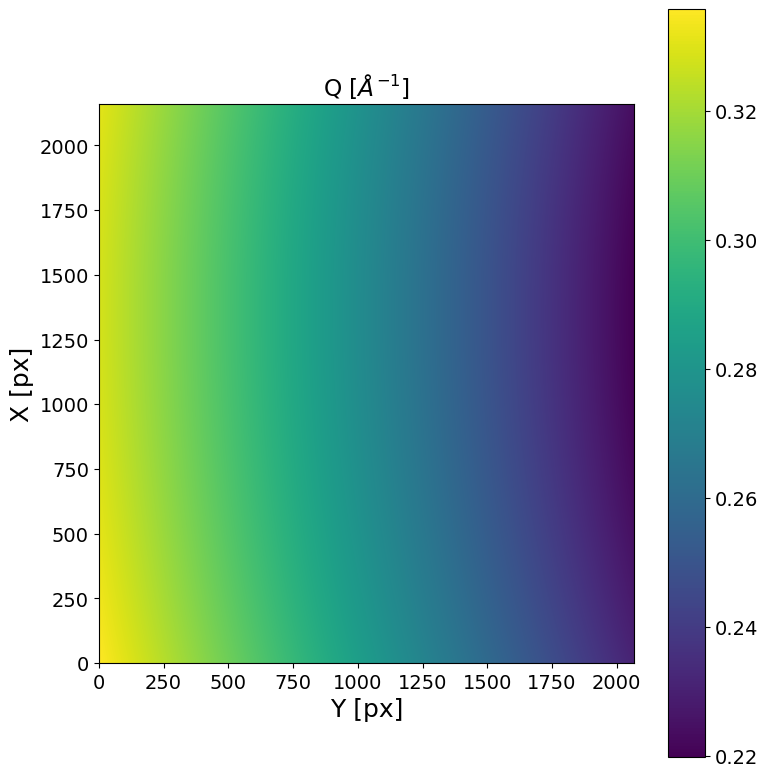

In [65]:
###################
Q    = .29
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=True)

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  49 pixels (of 4471016 => 0.0 %)
################################################################################



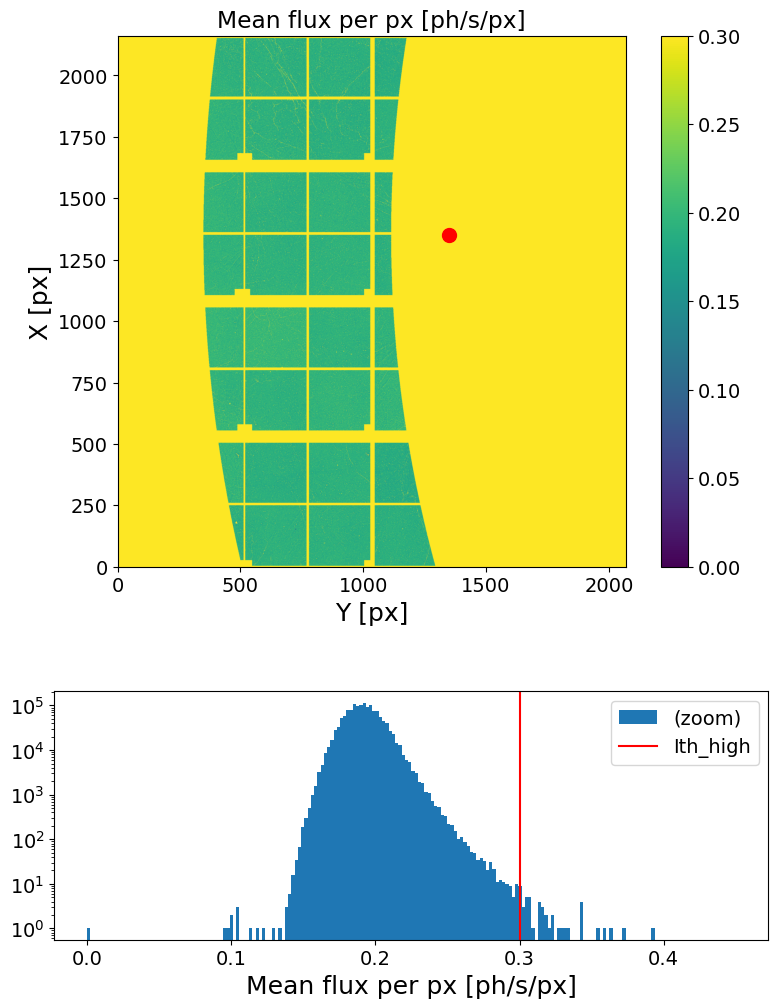

In [80]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.3, Nfi=int(1e6), Nff=int(10e6), e4m_mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [67]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

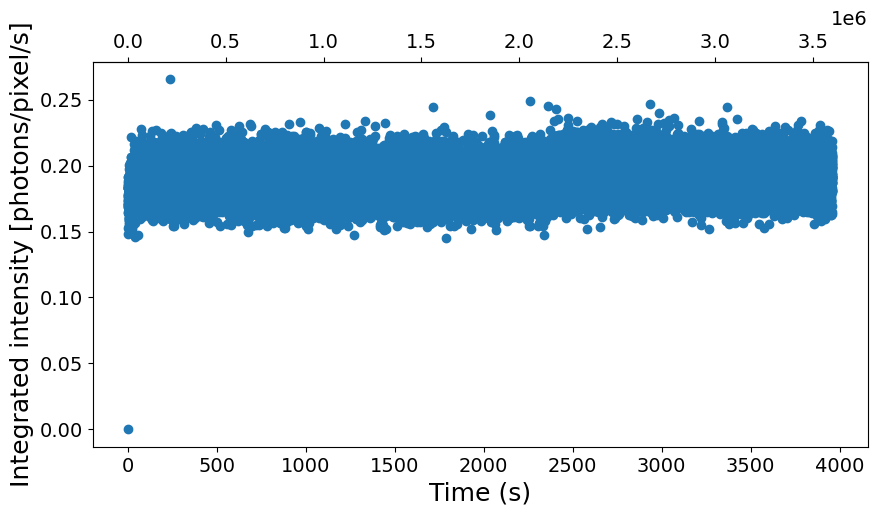

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [ ]:
####################
Ndata = 2**20*3
####################
print('log2(Nf) =', np.log2(e4m_data.shape[0]))
print('data thrown =', round((e4m_data.shape[0] - Ndata)/e4m_data.shape[0]*100, 2), '% (', round((e4m_data.shape[0] - Ndata)), ')')

log2(Nf) = 21.779430818057843
data thrown = 12.61 % ( 453936 )


In [76]:
##### INPUTS #####
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
Nfi = 40000
Nff = 40000 +  2**20*3
sparse_depth = 12
dense_depth = 20
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...
Done! (elapsed time = 31.23 s)
Masking data ...
Done! (elapsed time = 60.72 s)
	 | 3145728 frames X 1403639 pixels
	 | sparsity = 2.10e-04
	 | memory usage (sparse.csr_array @ float32) = 10.394 GB
Computing sparse multitau G2t...


100%|██████████| 768/768 [03:15<00:00,  3.92it/s]


Done! (elapsed time = 198.04 s)
Computing dense multitau G2t...


100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

Done! (elapsed time = 5.64 s)


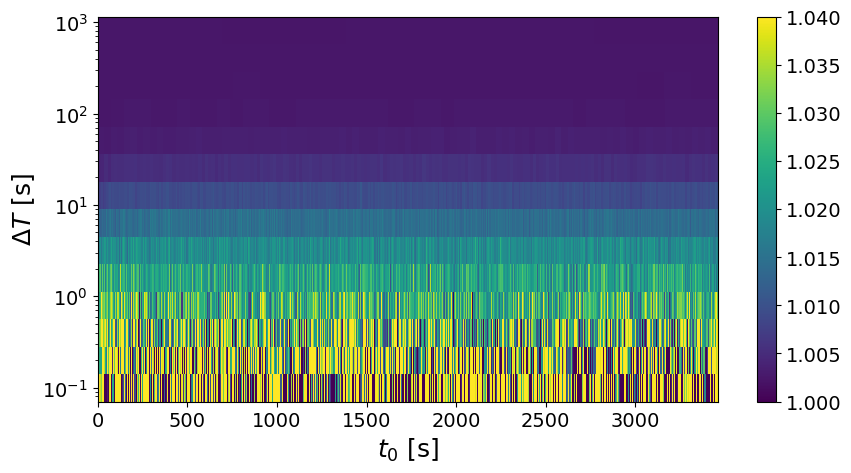

In [81]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 6
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt)

In [82]:
t_mt = 2**np.arange(len(G2tmt))*itime
g2_mt = np.array([np.mean(G2tmt[b]) for b in range(len(G2tmt))])
dg2_mt = np.array([np.std(G2tmt[b])/np.sqrt(G2tmt[b].size) for b in range(len(G2tmt))])

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)

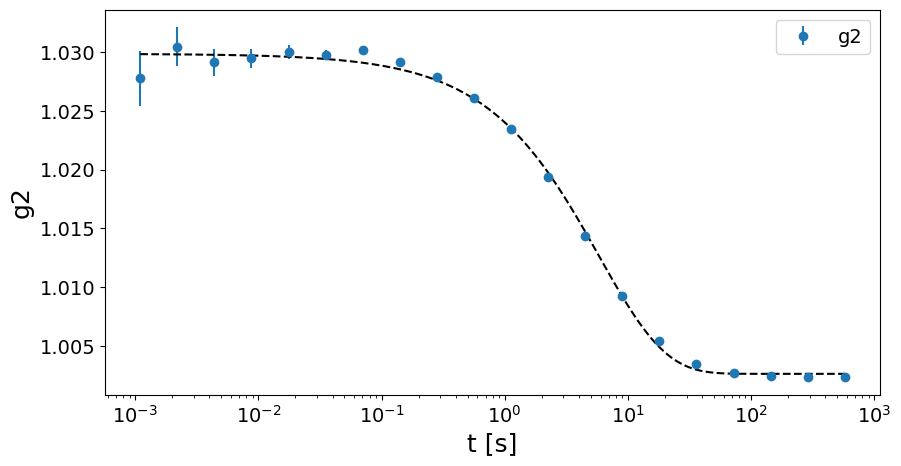

####### Fit parameters #######
tau = 5.8352 +/- 0.3648
beta = 0.8069 +/- 0.049
c = 0.0272 +/- 0.0005
y0 = 1.0026 +/- 0.0003


In [ ]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()

print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')

##   XPCS scan (Q =  0.461 Å$^{-1}$, delcoup = 5.00, 60 min @ 1ms (3600000fm) (GeO2_6q_delcoup5, dataset 1, scan 2) T = 30 $^{\circ}C $

In [84]:
#######################################
sample_name = 'GeO2_6q_delcoup_5'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, None# 2500000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=60, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 5.0
Q = 0.43
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/501 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/501 loops)
	 -> loading

### Qmask

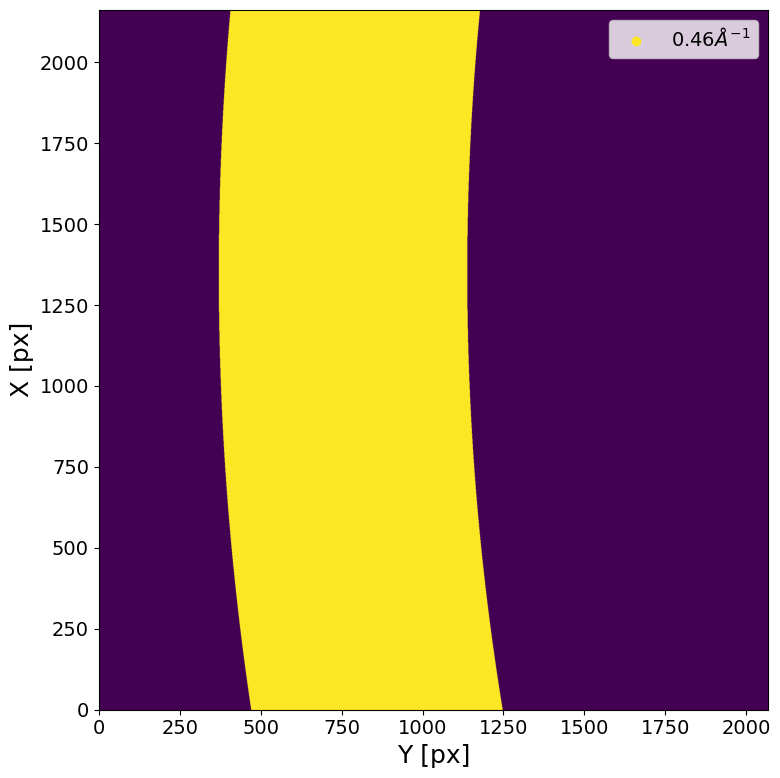

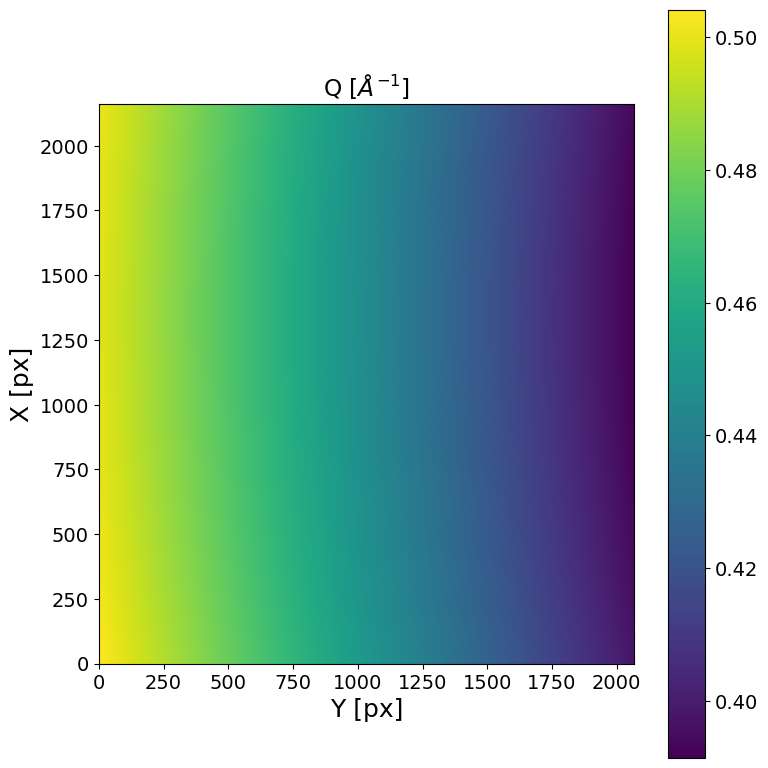

In [85]:
###################
Q    = .46
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=True)

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  226 pixels (of 4471016 => 0.02 %)
################################################################################



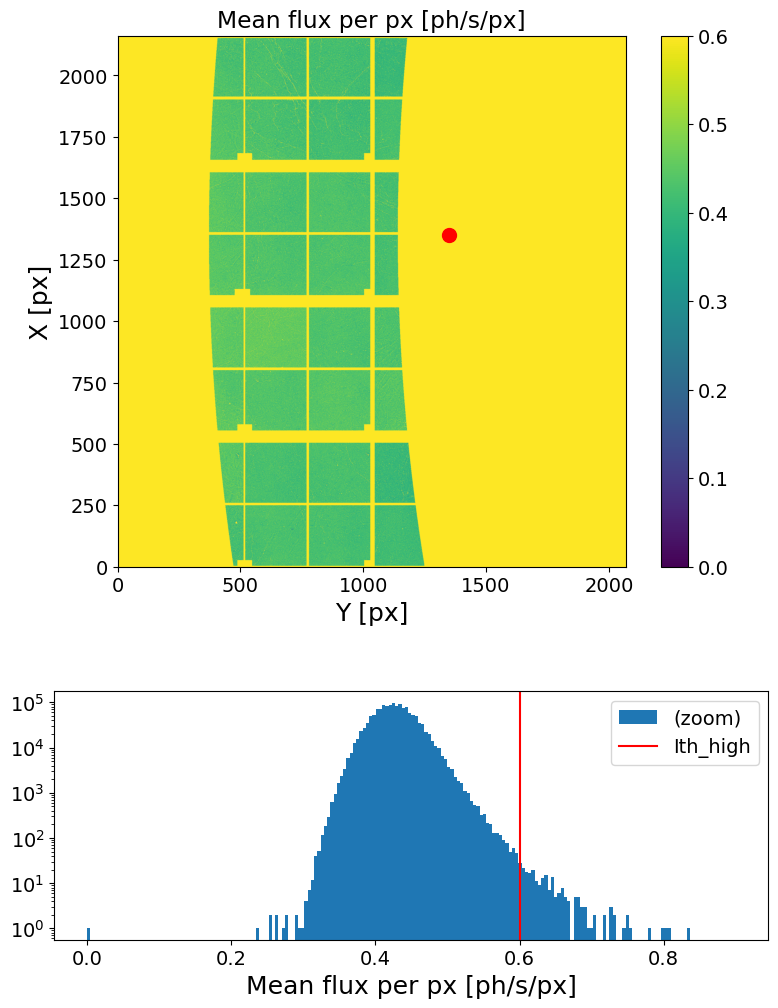

In [87]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.6, Nfi=int(1e5), Nff=int(1e6), e4m_mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [88]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

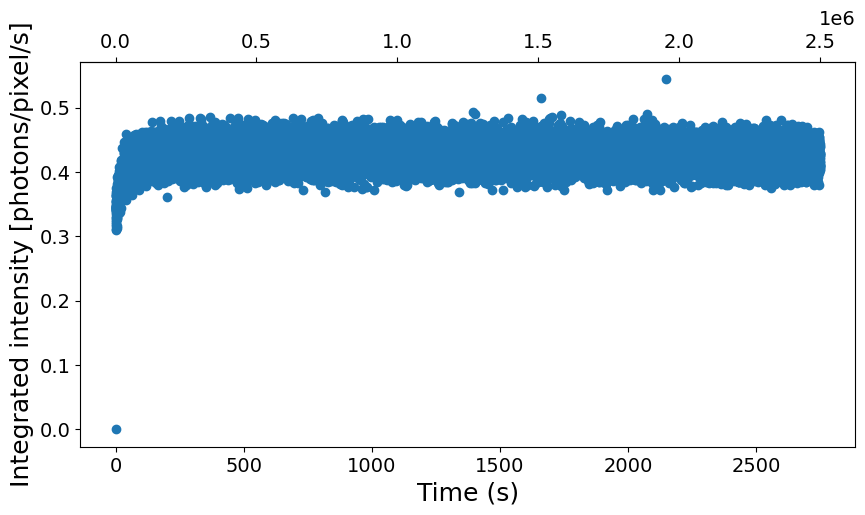

In [89]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [92]:
####################
depth = 20
Ndata = 2**21
####################
print('log2(Nf) =', np.log2(e4m_data.shape[0]))
print('data thrown =', round((e4m_data.shape[0] - Ndata)/e4m_data.shape[0]*100, 2), '% (', round((e4m_data.shape[0] - Ndata)), ')')

log2(Nf) = 21.253496664211536
data thrown = 16.11 % ( 402848 )


In [93]:
##### INPUTS #####
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
Nfi = 40000
Nff = 40000 + 2**21
sparse_depth = 12
dense_depth = 20
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...
Done! (elapsed time = 45.73 s)
Masking data ...
Done! (elapsed time = 84.72 s)
	 | 2097152 frames X 1404780 pixels
	 | sparsity = 4.71e-04
	 | memory usage (sparse.csr_array @ float32) = 15.524 GB
Computing sparse multitau G2t...


100%|██████████| 512/512 [02:11<00:00,  3.89it/s]


Done! (elapsed time = 132.22 s)
Computing dense multitau G2t...


100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

Done! (elapsed time = 4.96 s)


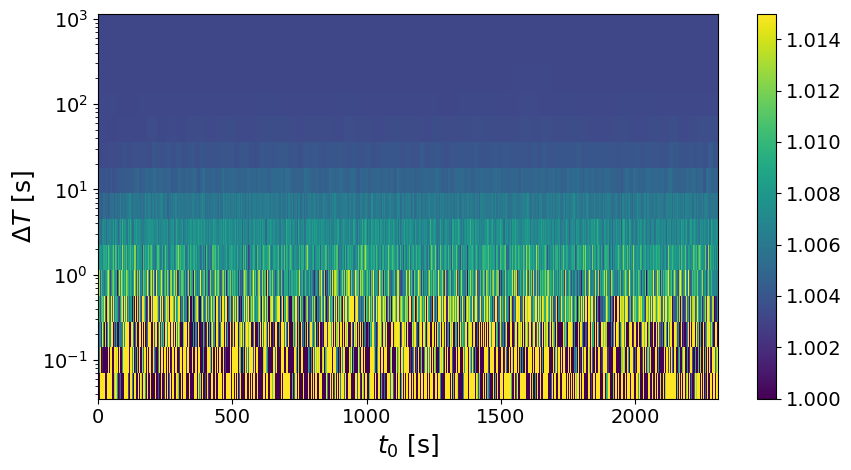

In [98]:
############################
vmin, vmax = 1.0, 1.015
lower_mt = 5
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt)

In [95]:
t_mt = 2**np.arange(len(G2tmt))*itime
g2_mt = np.array([np.mean(G2tmt[b]) for b in range(len(G2tmt))])
dg2_mt = np.array([np.std(G2tmt[b])/np.sqrt(G2tmt[b].size) for b in range(len(G2tmt))])

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)


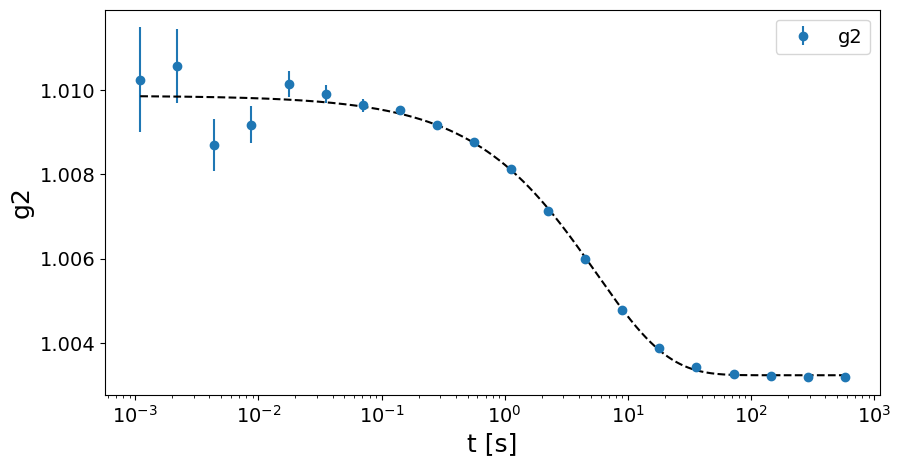

####### Fit parameters #######
tau = 5.4857 +/- 0.85
beta = 0.7413 +/- 0.1038
c = 0.0066 +/- 0.0003
y0 = 1.0032 +/- 0.0002


In [ ]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')